# Notebook: Roteiro 1 – Classificação EEG Saudável vs. Epilético

Dataset carregado com sucesso.
      Unnamed   X1   X2   X3   X4   X5   X6   X7   X8   X9  ...  X170  X171  \
0  X21.V1.791  135  190  229  223  192  125   55   -9  -33  ...   -17   -15   
1  X15.V1.924  386  382  356  331  320  315  307  272  244  ...   164   150   
2     X8.V1.1  -32  -39  -47  -37  -32  -36  -57  -73  -85  ...    57    64   
3   X16.V1.60 -105 -101  -96  -92  -89  -95 -102 -100  -87  ...   -82   -81   
4   X20.V1.54   -9  -65  -98 -102  -78  -48  -16    0  -21  ...     4     2   

   X172  X173  X174  X175  X176  X177  X178  y  
0   -31   -77  -103  -127  -116   -83   -51  4  
1   146   152   157   156   154   143   129  1  
2    48    19   -12   -30   -35   -35   -36  5  
3   -80   -77   -85   -77   -72   -69   -65  5  
4   -12   -32   -41   -65   -83   -89   -73  5  

[5 rows x 180 columns]


<Figure size 1000x600 with 0 Axes>

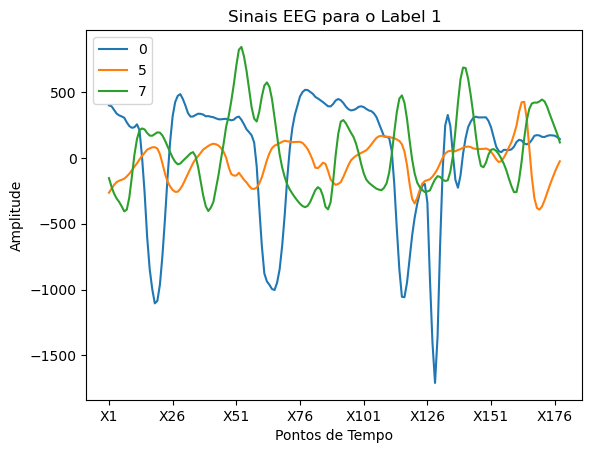

<Figure size 1000x600 with 0 Axes>

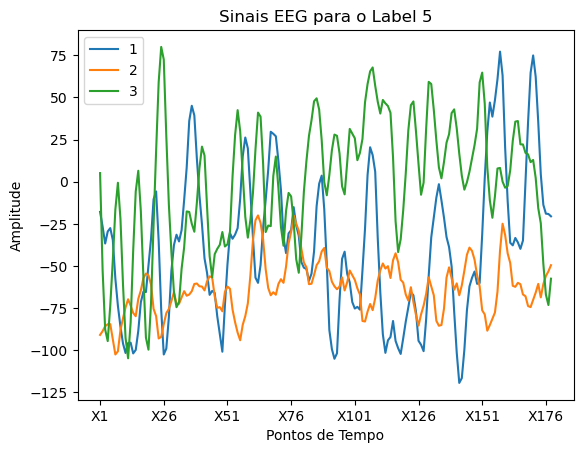

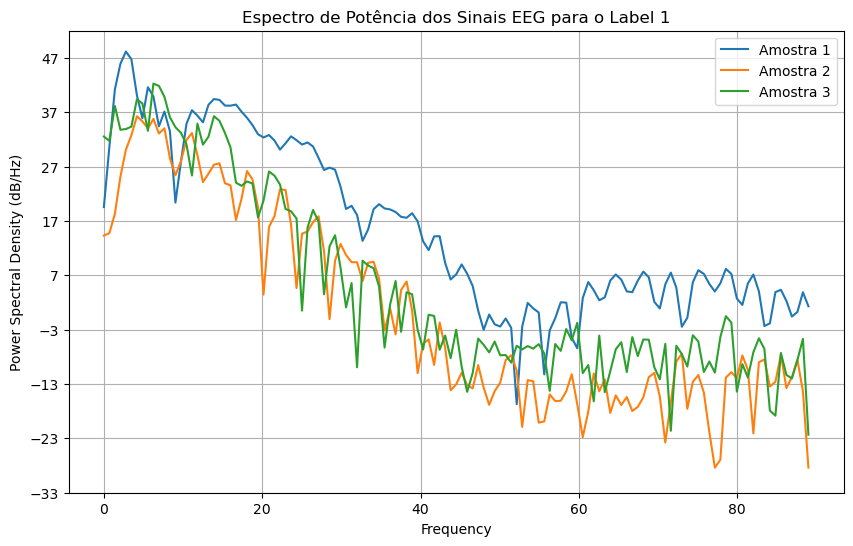

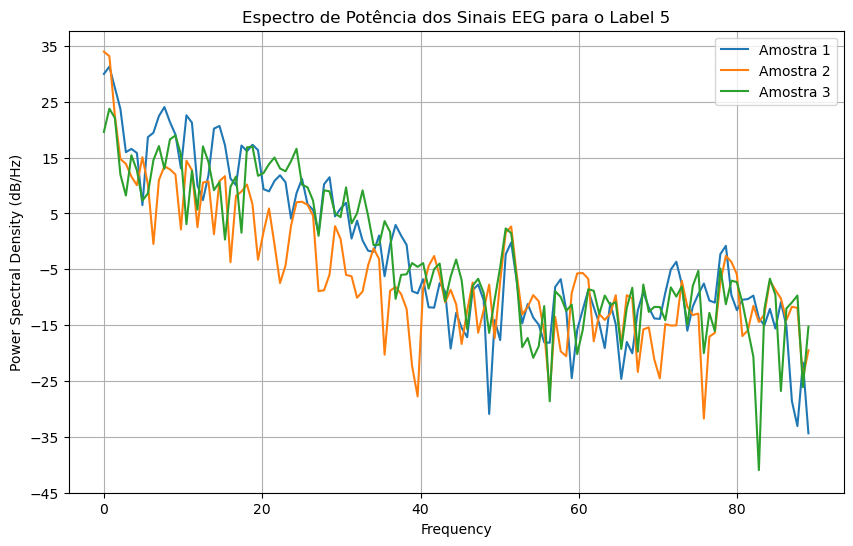

Melhor modelo para RandomForest: RandomForestClassifier(min_samples_split=5, n_estimators=150, random_state=42)
Melhor modelo para GradientBoosting: GradientBoostingClassifier(max_depth=5, random_state=42)
RandomForest Accuracy: 0.9924
GradientBoosting Accuracy: 0.9880

Melhor Modelo: RandomForestClassifier(min_samples_split=5, n_estimators=150, random_state=42)

Relatório de Classificação:
               precision    recall  f1-score   support

           1       0.99      0.99      0.99       449
           5       0.99      0.99      0.99       471

    accuracy                           0.99       920
   macro avg       0.99      0.99      0.99       920
weighted avg       0.99      0.99      0.99       920



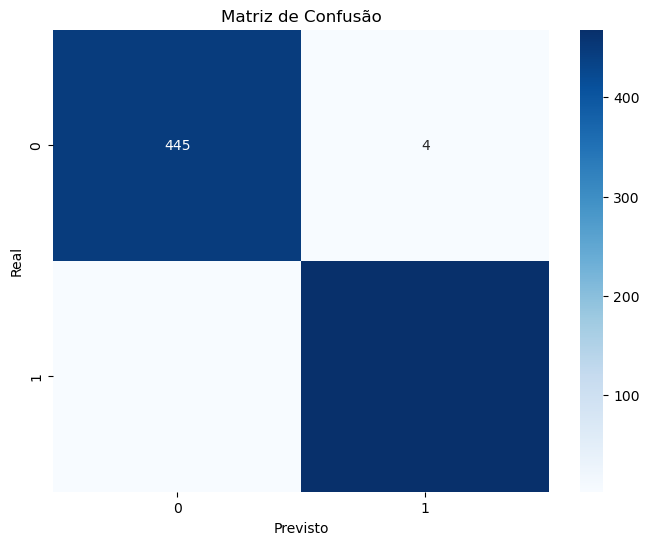


Validação Cruzada K-Fold para o melhor modelo: RandomForest
Accuracy Médio com Validação Cruzada (Dados Brutos): 0.9946 (+/- 0.0022)


C:\Users\Matheus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Matheus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Matheus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Matheus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

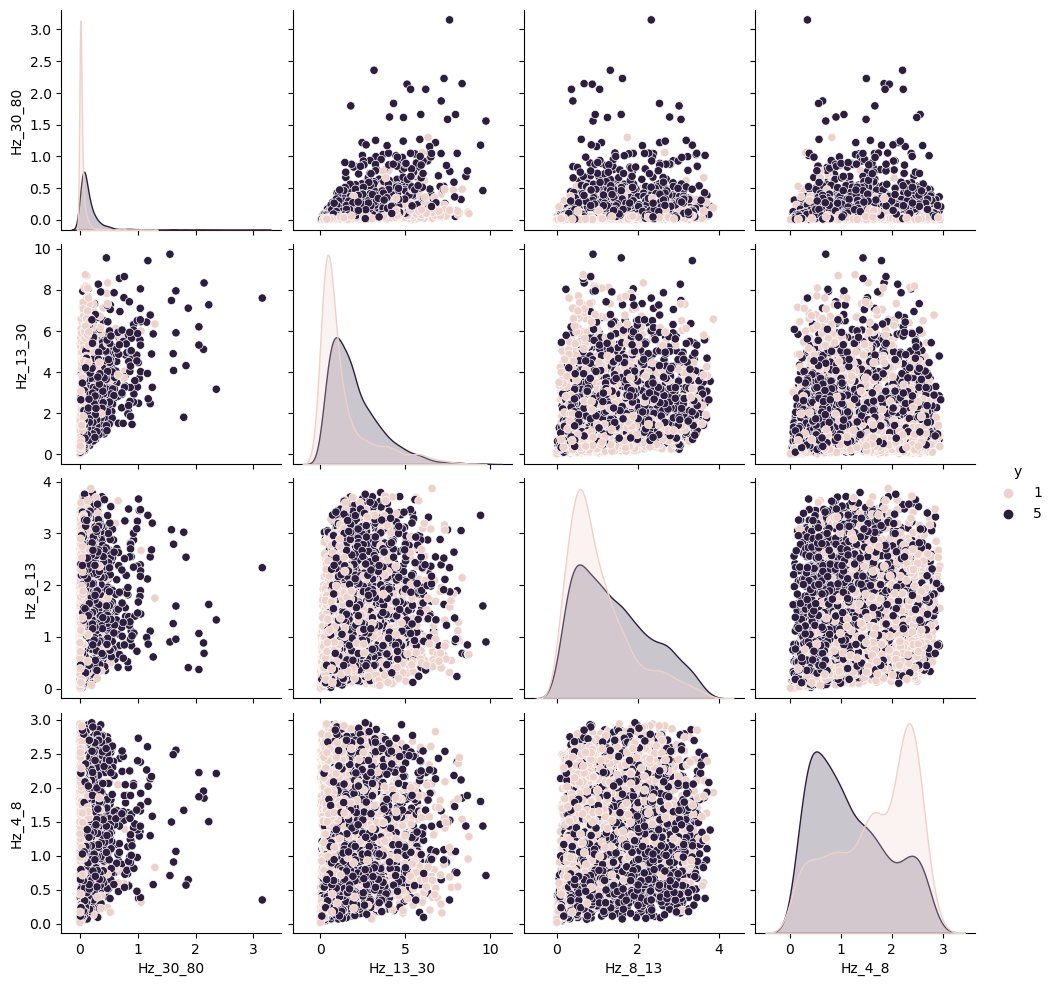

RandomForest com Características Extraídas Accuracy: 0.8261
GradientBoosting com Características Extraídas Accuracy: 0.8402

Melhor Modelo com Características Extraídas: GradientBoostingClassifier(max_depth=5, random_state=42)

Relatório de Classificação com Características:
               precision    recall  f1-score   support

           1       0.86      0.81      0.83       449
           5       0.83      0.87      0.85       471

    accuracy                           0.84       920
   macro avg       0.84      0.84      0.84       920
weighted avg       0.84      0.84      0.84       920



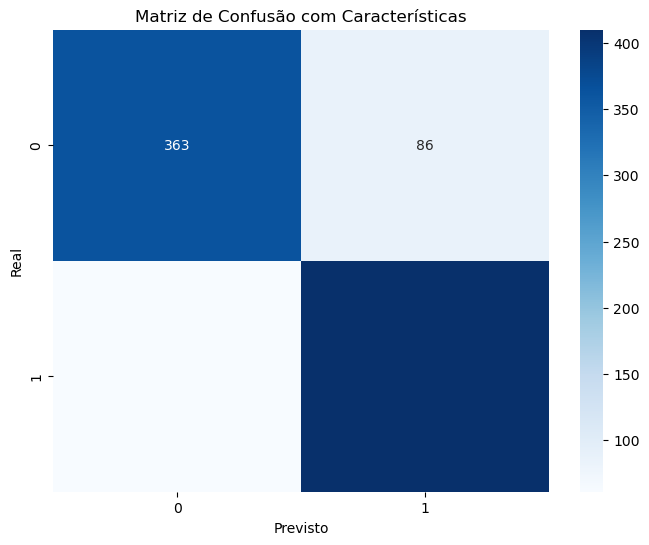

C:\Users\Matheus\anaconda3\Lib\site-packages\pywt\_multilevel.py:43: UserWarning: Level value of 5 is too high: all coefficients will experience boundary effects.
  warnings.warn(


RandomForest com Características de Wavelet Accuracy: 0.9978
GradientBoosting com Características de Wavelet Accuracy: 0.9957

Melhor Modelo com Características de Wavelet: RandomForestClassifier(min_samples_split=5, n_estimators=150, random_state=42)

Relatório de Classificação com Características de Wavelet:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       449
           5       1.00      1.00      1.00       471

    accuracy                           1.00       920
   macro avg       1.00      1.00      1.00       920
weighted avg       1.00      1.00      1.00       920



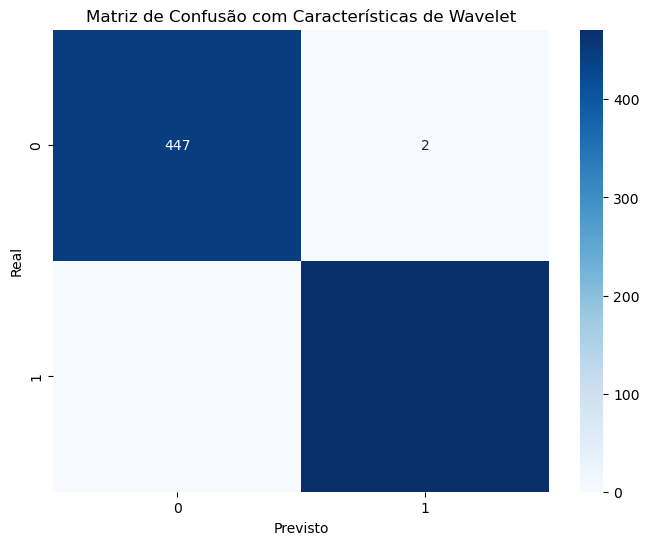

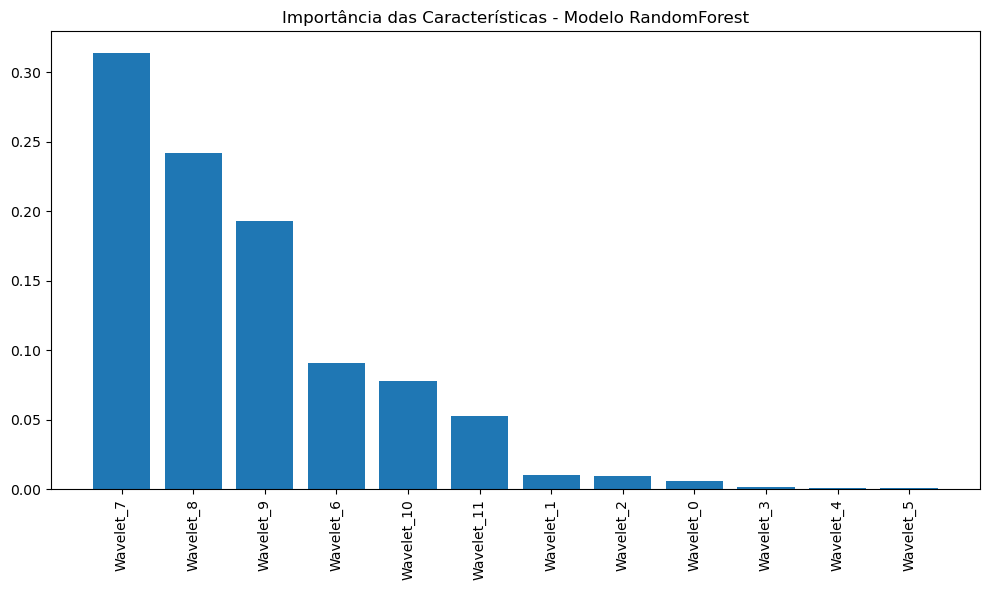


Validação Cruzada K-Fold para RandomForest com Características de Wavelet
Accuracy Médio com Validação Cruzada (Características de Wavelet): 0.9972 (+/- 0.0011)

Validação Cruzada K-Fold para SVM com Características de Wavelet
Accuracy Médio com Validação Cruzada (Características de Wavelet): 0.5000 (+/- 0.0000)
Comparação dos resultados:
Melhor modelo com dados brutos: RandomForest com Accuracy de 0.9924
Melhor modelo com características extraídas: GradientBoostingClassifier(max_depth=5, random_state=42) com Accuracy de 0.8402
Melhor modelo com características de wavelet: RandomForestClassifier(min_samples_split=5, n_estimators=150, random_state=42) com Accuracy de 0.9978

Análise de Overfitting e Eficiência dos Modelos:
Verifique as métricas de validação cruzada e o desempenho de modelos diferentes para determinar a ocorrência de overfitting.
Utilize modelos menos complexos ou regularização para evitar overfitting.


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import neurokit2 as nk
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
import pywt
import os

# Criar um diretório para os resultados, caso ele não exista
output_dir = 'Resultados'
os.makedirs(output_dir, exist_ok=True)

# Passo 1: Ler o conjunto de dados e visualizá-lo
df = pd.read_csv('Dados/Epileptic Seizure Recognition.csv')
print("Dataset carregado com sucesso.")
print(df.head())

# Passo 2: Selecionar dados para os labels 1 e 5
df = df[df['y'].isin([1, 5])].reset_index(drop=True)
labels = df.pop('y')  # Separar os labels dos dados

# Passo 3: Converter todas as colunas para numérico, forçando erros para NaN
df = df.apply(pd.to_numeric, errors='coerce')

# Remover colunas com todos os valores NaN
df = df.dropna(axis=1, how='all')

# Preencher NaNs com a média da coluna
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Ajustar o nível DC subtraindo a média de cada amostra de dados
adjusted_df = df_imputed - df_imputed.mean()

# Passo 4: Plotar 3 exemplos de sinais para cada label
for label in [1, 5]:
    plt.figure(figsize=(10, 6))
    sample = adjusted_df[labels == label].iloc[:3].T  # 3 amostras para cada label
    sample.plot(title=f'Sinais EEG para o Label {label}')
    plt.xlabel('Pontos de Tempo')
    plt.ylabel('Amplitude')
    plt.savefig(os.path.join(output_dir, f'EEG_Sinais_Label_{label}.png'))
    plt.show()

# Plotar o espectro de potência dessas amostras
for label in [1, 5]:
    plt.figure(figsize=(10, 6))
    sample = adjusted_df[labels == label].iloc[:3].T
    for i, col in enumerate(sample.columns):
        plt.psd(sample[col], NFFT=256, Fs=178, label=f'Amostra {i+1}')
    plt.title(f'Espectro de Potência dos Sinais EEG para o Label {label}')
    plt.legend()
    plt.savefig(os.path.join(output_dir, f'Espectro_Potência_Label_{label}.png'))
    plt.show()

# Passo 5: Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(adjusted_df, labels, test_size=0.2, random_state=42)

# Passo 6: Definir os modelos e parâmetros de hiperparâmetro para otimização usando RandomizedSearchCV
models = {
    'RandomForest': RandomForestClassifier(random_state=42),
    'GradientBoosting': GradientBoostingClassifier(random_state=42)
}

param_dist = {
    'RandomForest': {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5]
    },
    'GradientBoosting': {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
}

# Otimizar os hiperparâmetros usando RandomizedSearchCV
best_models = {}
for name, model in models.items():
    clf = RandomizedSearchCV(model, param_dist[name], n_iter=5, cv=3, random_state=42)
    clf.fit(X_train, y_train)
    best_models[name] = clf.best_estimator_
    print(f"Melhor modelo para {name}: {clf.best_estimator_}")

# Treinar e avaliar os melhores modelos
best_model_name = None
best_score = 0
for name, model in best_models.items():
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"{name} Accuracy: {score:.4f}")
    if score > best_score:
        best_model_name = name
        best_score = score

# Matriz de confusão para o melhor modelo
best_model = best_models[best_model_name]
y_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("\nMelhor Modelo:", best_model)
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.savefig(os.path.join(output_dir, 'Confusion_Matrix_Best_Model.png'))
plt.show()

# Validação Cruzada K-Fold para o modelo selecionado
print(f"\nValidação Cruzada K-Fold para o melhor modelo: {best_model_name}")
cv_scores = cross_val_score(best_model, adjusted_df, labels, cv=3)
print(f"Accuracy Médio com Validação Cruzada (Dados Brutos): {np.mean(cv_scores):.4f} (+/- {np.std(cv_scores):.4f})")

# Passo 8: Extração de características usando nk.eeg_power
eeg_features_list = []
for i in range(adjusted_df.shape[0]):
    features = nk.eeg_power(adjusted_df.iloc[i, :].values, sampling_rate=178)
    numeric_features = features.select_dtypes(include=[np.number])
    eeg_features_list.append(numeric_features.mean().to_dict())

eeg_features = pd.DataFrame(eeg_features_list)
eeg_features = eeg_features.dropna(axis=1, how='all')

imputer = SimpleImputer(strategy='mean')
eeg_features_imputed = pd.DataFrame(imputer.fit_transform(eeg_features), columns=eeg_features.columns)

if eeg_features_imputed.shape[0] != labels.shape[0]:
    eeg_features_imputed = eeg_features_imputed.iloc[:labels.shape[0]]

sns.pairplot(eeg_features_imputed.join(labels), hue='y')
plt.savefig(os.path.join(output_dir, 'Pairplot.png'))
plt.show()

X_train_feat, X_test_feat, y_train_feat, y_test_feat = train_test_split(eeg_features_imputed, labels, test_size=0.2, random_state=42)

best_model_feat = None
best_score_feat = 0
for name, model in best_models.items():
    model.fit(X_train_feat, y_train_feat)
    score = model.score(X_test_feat, y_test_feat)
    print(f"{name} com Características Extraídas Accuracy: {score:.4f}")
    if score > best_score_feat:
        best_model_feat = model
        best_score_feat = score

y_pred_feat = best_model_feat.predict(X_test_feat)
cm_feat = confusion_matrix(y_test_feat, y_pred_feat)
print("\nMelhor Modelo com Características Extraídas:", best_model_feat)
print("\nRelatório de Classificação com Características:\n", classification_report(y_test_feat, y_pred_feat))

plt.figure(figsize=(8, 6))
sns.heatmap(cm_feat, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão com Características')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.savefig(os.path.join(output_dir, 'Confusion_Matrix_With_Features.png'))
plt.show()

# Extração dos coeficientes da Transformada Discreta de Wavelet
wavelet_features = []
for i in range(adjusted_df.shape[0]):
    coeffs = pywt.wavedec(adjusted_df.iloc[i], 'db4', level=5)
    wavelet_features.append([np.mean(c) for c in coeffs] + [np.std(c) for c in coeffs])

wavelet_df = pd.DataFrame(wavelet_features, columns=[f'Wavelet_{i}' for i in range(len(wavelet_features[0]))])

X_train_wavelet, X_test_wavelet, y_train_wavelet, y_test_wavelet = train_test_split(wavelet_df, labels, test_size=0.2, random_state=42)

best_model_wavelet = None
best_score_wavelet = 0
for name, model in best_models.items():
    model.fit(X_train_wavelet, y_train_wavelet)
    score = model.score(X_test_wavelet, y_test_wavelet)
    print(f"{name} com Características de Wavelet Accuracy: {score:.4f}")
    if score > best_score_wavelet:
        best_model_wavelet = model
        best_score_wavelet = score

y_pred_wavelet = best_model_wavelet.predict(X_test_wavelet)
cm_wavelet = confusion_matrix(y_test_wavelet, y_pred_wavelet)
print("\nMelhor Modelo com Características de Wavelet:", best_model_wavelet)
print("\nRelatório de Classificação com Características de Wavelet:\n", classification_report(y_test_wavelet, y_pred_wavelet))

plt.figure(figsize=(8, 6))
sns.heatmap(cm_wavelet, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão com Características de Wavelet')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.savefig(os.path.join(output_dir, 'Confusion_Matrix_Wavelet_Features.png'))
plt.show()

# Analisar a importância das características para o modelo RandomForest
if isinstance(best_model_wavelet, RandomForestClassifier):
    importances = best_model_wavelet.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(10, 6))
    plt.title("Importância das Características - Modelo RandomForest")
    plt.bar(range(len(importances)), importances[indices], align="center")
    plt.xticks(range(len(importances)), wavelet_df.columns[indices], rotation=90)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'Feature_Importance_Wavelet.png'))
    plt.show()

# Validação Cruzada K-Fold para RandomForest usando Características de Wavelet
print("\nValidação Cruzada K-Fold para RandomForest com Características de Wavelet")
cv_scores_rf_wavelet = cross_val_score(RandomForestClassifier(n_estimators=200, random_state=42), wavelet_df, labels, cv=5)
print(f"Accuracy Médio com Validação Cruzada (Características de Wavelet): {np.mean(cv_scores_rf_wavelet):.4f} (+/- {np.std(cv_scores_rf_wavelet):.4f})")

# Validação Cruzada K-Fold para SVM usando Características de Wavelet
print("\nValidação Cruzada K-Fold para SVM com Características de Wavelet")
cv_scores_svm_wavelet = cross_val_score(SVC(C=0.1, gamma=1, probability=True, random_state=42), wavelet_df, labels, cv=5)
print(f"Accuracy Médio com Validação Cruzada (Características de Wavelet): {np.mean(cv_scores_svm_wavelet):.4f} (+/- {np.std(cv_scores_svm_wavelet):.4f})")

# Comparação final dos resultados
print("Comparação dos resultados:")
print(f"Melhor modelo com dados brutos: {best_model_name} com Accuracy de {best_score:.4f}")
print(f"Melhor modelo com características extraídas: {best_model_feat} com Accuracy de {best_score_feat:.4f}")
print(f"Melhor modelo com características de wavelet: {best_model_wavelet} com Accuracy de {best_score_wavelet:.4f}")

# Análise final sobre a eficiência das características extraídas e comparação dos resultados
print("\nAnálise de Overfitting e Eficiência dos Modelos:")
print("Verifique as métricas de validação cruzada e o desempenho de modelos diferentes para determinar a ocorrência de overfitting.")
print("Utilize modelos menos complexos ou regularização para evitar overfitting.")